### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
movieItemData = pd.read_csv('MovieItemData.csv')
movieItemData.head()
userData = pd.read_csv('userData.csv')
userData.head()
userRatingsData = pd.read_csv('UserRatingsData.csv')
userRatingsData.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
movieItemData.info()
movieItemData.shape
movieItemData.describe()
movieItemData.isnull().values.any()
pd.DataFrame( movieItemData.isnull().sum(), columns= ['Number of missing values in Movie Item Data'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

(1681, 22)

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


False

,Number of missing values in Movie Item Data
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


In [4]:
userData.info()
userData.shape
userData.describe()
userData.isnull().values.any()
pd.DataFrame( userData.isnull().sum(), columns= ['Number of missing values in User Data'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


(943, 5)

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


False

,Number of missing values in User Data
user id,0
age,0
gender,0
occupation,0
zip code,0


In [5]:
userRatingsData.info()
userRatingsData.shape
userRatingsData.describe()
userRatingsData.isnull().values.any()
pd.DataFrame( userRatingsData.isnull().sum(), columns= ['Number of missing values in User Ratings Data'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


(100000, 4)

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


False

,Number of missing values in User Ratings Data
user id,0
movie id,0
rating,0
timestamp,0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [6]:
# use sum on the default axis
genreDF = movieItemData.drop(columns=['movie id', 'movie title','release date'])
pd.DataFrame( genreDF.sum(), columns= ['Number of movies per Genre'])

,Number of movies per Genre
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


#### 5. Find the movies that have more than one genre - 2.5 marks

In [7]:
#hint: use sum on the axis = 1
movieItemData[movieItemData.iloc[:,4:22].sum(axis=1)>1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [8]:
movieItemData.shape
movieItemData[movieItemData['unknown']>0]
movieItemData[movieItemData['unknown']>0].index

#Drop the row that has unknown genre
movieItemData = movieItemData.drop(movieItemData[movieItemData['unknown']>0].index)

#check shape after dropping the movie that is mapped to unknown genre
movieItemData.shape
movieItemData[movieItemData['unknown']>0]

(1681, 22)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Int64Index([1371], dtype='int64')

(1680, 22)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [9]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [10]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


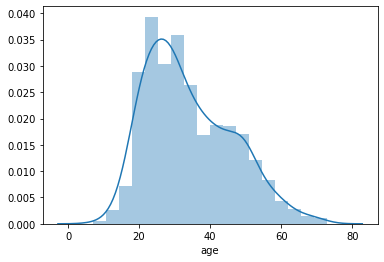

In [11]:
#your answers here
sns.distplot(userData['age'])

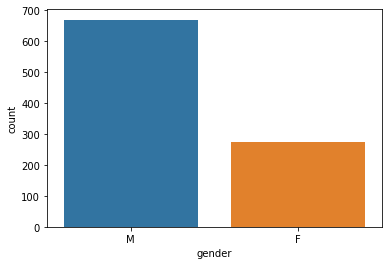

In [12]:
sns.countplot(userData['gender'])


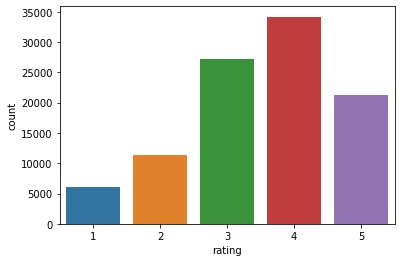

In [13]:
sns.countplot(userRatingsData['rating'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

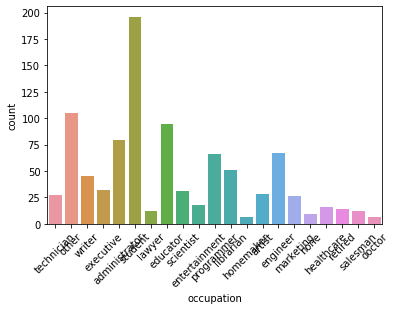

In [14]:
sns.countplot(userData['occupation'])
plt.xticks(rotation=45)
plt.show()

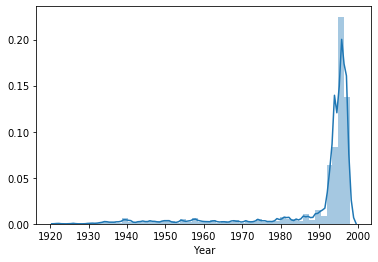

In [15]:

movieItemData[['Date','Month','Year']] = movieItemData['release date'].str.split("-",expand=True)
sns.distplot(movieItemData['Year'])
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

,Action,Adventure,Animation,Childrens,Comedy,Crime,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Year,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


(71, 17)

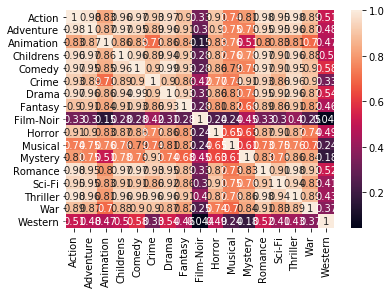

In [16]:
newDataFrame = pd.DataFrame(movieItemData.groupby('Year')['Action','Adventure','Animation','Childrens','Comedy','Crime','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'].sum())
newDataFrame.head()
newDataFrame.shape

sns.heatmap(newDataFrame.corr(), annot=True)

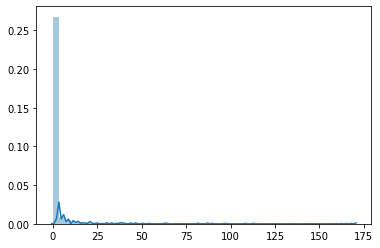

In [17]:
sns.distplot(newDataFrame)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [18]:
#your answer here

result = pd.merge(movieItemData[['movie id', 'movie title']],
                  userRatingsData[['movie id','rating']],
                 on='movie id')
result.head()
ratingsFrame = pd.DataFrame(result.groupby(['movie title'])['rating'].sum())
ratingsFrame.head()

#Top 25 movies based on rating
ratingsFrame.sort_values('rating',ascending = False).head(25)


,movie id,movie title,rating
0,1,Toy Story,4
1,1,Toy Story,5
2,1,Toy Story,4
3,1,Toy Story,4
4,1,Toy Story,3


,rating
movie title,
'Til There Was You,21
1-900,13
101 Dalmatians,317
12 Angry Men,543
187,124


,rating
movie title,
Star Wars,2541
Fargo,2111
Return of the Jedi,2032
Contact,1936
Raiders of the Lost Ark,1786
"Godfather, The",1769
"English Patient, The",1759
Toy Story,1753
"Silence of the Lambs, The",1673


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [19]:
result = pd.merge(userData,
                  userRatingsData[['user id','movie id','rating']],
                 on='user id')
result.head()
result1 = pd.merge(result,
         movieItemData,
         on='movie id')
result1.head()

,user id,age,gender,occupation,zip code,movie id,rating
0,1,24,M,technician,85711,61,4
1,1,24,M,technician,85711,189,3
2,1,24,M,technician,85711,33,4
3,1,24,M,technician,85711,160,4
4,1,24,M,technician,85711,20,4


,user id,age,gender,occupation,zip code,movie id,rating,movie title,release date,unknown,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Date,Month,Year
0,1,24,M,technician,85711,61,4,Three Colors: White,01-Jan-1994,0,...,0,0,0,0,0,0,0,01,Jan,1994
1,13,47,M,educator,29206,61,4,Three Colors: White,01-Jan-1994,0,...,0,0,0,0,0,0,0,01,Jan,1994
2,18,35,F,other,37212,61,4,Three Colors: White,01-Jan-1994,0,...,0,0,0,0,0,0,0,01,Jan,1994
3,58,27,M,programmer,52246,61,5,Three Colors: White,01-Jan-1994,0,...,0,0,0,0,0,0,0,01,Jan,1994
4,59,49,M,educator,8403,61,4,Three Colors: White,01-Jan-1994,0,...,0,0,0,0,0,0,0,01,Jan,1994


In [20]:
# returns count of ratings based on gender
result1.groupby(['gender'])['rating'].sum()

gender
F     90894
M    262060
Name: rating, dtype: int64

In [22]:
##Men watch more drama than women

# returns count of ratings based on gender and drama
result1.groupby(['gender','Drama'])['rating'].sum()

#Men % = 106794/262060 = 40.7
#Female % = 40314/90894 = 44.35

gender  Drama
F       0         50580
        1         40314
M       0        155266
        1        106794
Name: rating, dtype: int64

In [23]:
## Women watch more Sci-Fi than men

# returns count of ratings based on gender and sci-fi
result1.groupby(['gender','Sci-Fi'])['rating'].sum()

#Men % = 36132/262060 = 13.78
#Female % = 9196/90894 = 10.11

gender  Sci-Fi
F       0          81698
        1           9196
M       0         225928
        1          36132
Name: rating, dtype: int64

In [24]:
## Men watch more Romance than women

# returns count of ratings based on gender and romance
result1.groupby(['gender','Romance'])['rating'].sum()

#Men % = 49067/262060 = 18.7
#Female % = 21415/90894 = 23.56

gender  Romance
F       0           69479
        1           21415
M       0          212993
        1           49067
Name: rating, dtype: int64

In [ ]:
# Men watch more drama than women - FALSE (Men - 41%, Female- 45%)
# Women watch more Sci-Fi than men - FALSE (Men - 14#, Female- 11%)
# Men watch more Romance than women - FALSE (Men - 19%, Female- 24%)